In [1]:
%%bigquery train_join
SELECT * FROM `sql-tra.energy_prediction.train_join_n0` ORDER BY building_id,timestamp
#データの読み込み

Query is running:   0%|          |

Downloading:   0%|          |

## データ可視化

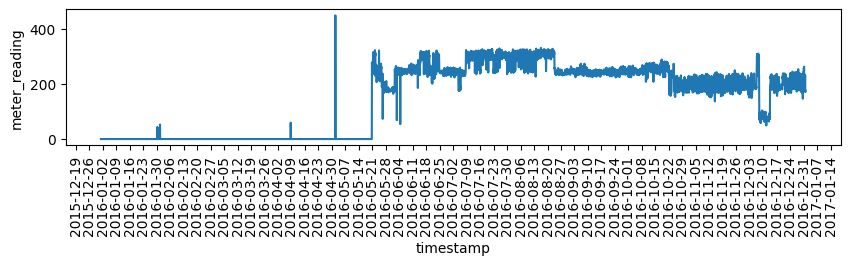

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

df=train_join[train_join['building_id']==0]
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(df['timestamp'], df['meter_reading'])
# ax.plot(df['timestamp'], df['air_temperature'])
# ax.plot(df['timestamp'], df['dew_temperature'])
# ax.plot(df['timestamp'], df['wind_speed'])

ax.set_xlabel("timestamp") #X軸ラベル
ax.set_ylabel("meter_reading") #Y軸ラベル

#時間間隔設定
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=7, tz=None))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

fig.autofmt_xdate(rotation=90, ha="center") #X軸目盛向き

## 目的変数の基本情報確認

In [2]:
#ライブラリ読み込み
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

count    1.148767e+07
mean     1.778589e+02
std      3.737603e+02
min      4.000000e-04
25%      2.335000e+01
50%      6.856670e+01
75%      1.780000e+02
max      9.966900e+03
Name: meter_reading, dtype: float64
Skewness: 7.294050
Kurtosis: 81.424599


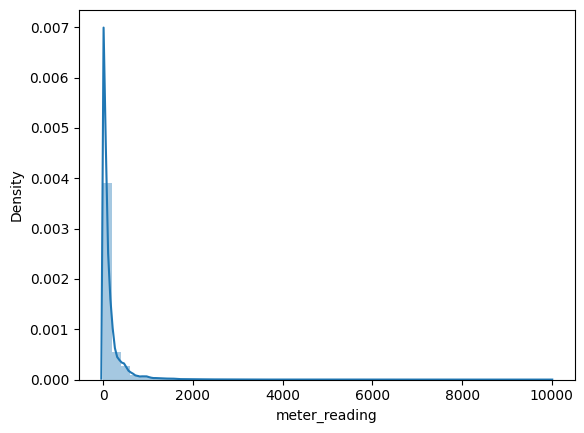

In [11]:
df = train_join
print(df['meter_reading'].describe()) #基本統計量(十分なデータ量があるか)

sns.distplot(df['meter_reading']) #ヒストグラム(正規性の確認)
print('Skewness: %f' % df['meter_reading'].skew()) #歪度
print('Kurtosis: %f' % df['meter_reading'].kurt()) #尖度

Skewness: -0.212133
Kurtosis: -0.083280


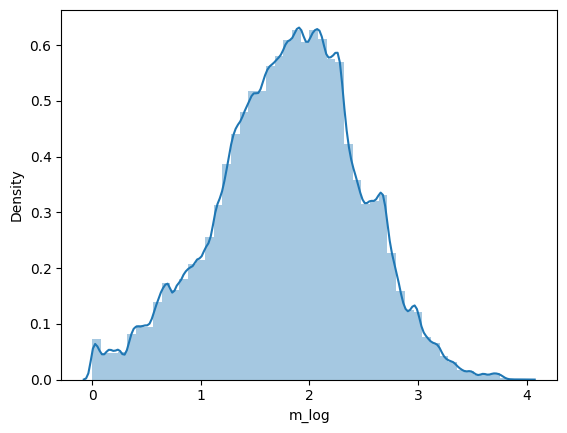

In [7]:
#対数変換
df['m_log'] = np.log10(df['meter_reading'] + 1)
sns.distplot(df['m_log']) #ヒストグラム(正規性の確認)
print('Skewness: %f' % df['m_log'].skew()) #歪度
print('Kurtosis: %f' % df['m_log'].kurt()) #尖度

## 説明変数の基本情報確認

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#特徴量エンジニアリング　timestamp型を変換
#電力使用量は気温の変化や出勤状況に応じて時間変化すると考えられる
#hour,monthは温度と多重共線性持つかも
df = train_join
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['week'] = df['timestamp'].dt.dayofweek #月曜が0, 日曜が6で変換

In [5]:
#目的変数でソート
df = train_join.sort_values('meter_reading')

# 欠損値を除いたラベルエンコーディング
le = LabelEncoder()
not_null = df['primary_use'][df['primary_use'].notnull()]
df['primary_use'] = pd.Series(le.fit_transform(not_null),index=not_null.index)
df['meter_reading'] = np.log10(df['meter_reading'] + 1)
df = df.drop(columns=['timestamp','timestamp_1', 'meter','site_id_1','building_id_1'])

In [11]:
#X_train選択用
df.columns.values

array(['building_id', 'meter_reading', 'site_id', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed',
       'primary_use', 'square_feet', 'year_built', 'floor_count', 'month',
       'day', 'hour', 'week'], dtype=object)

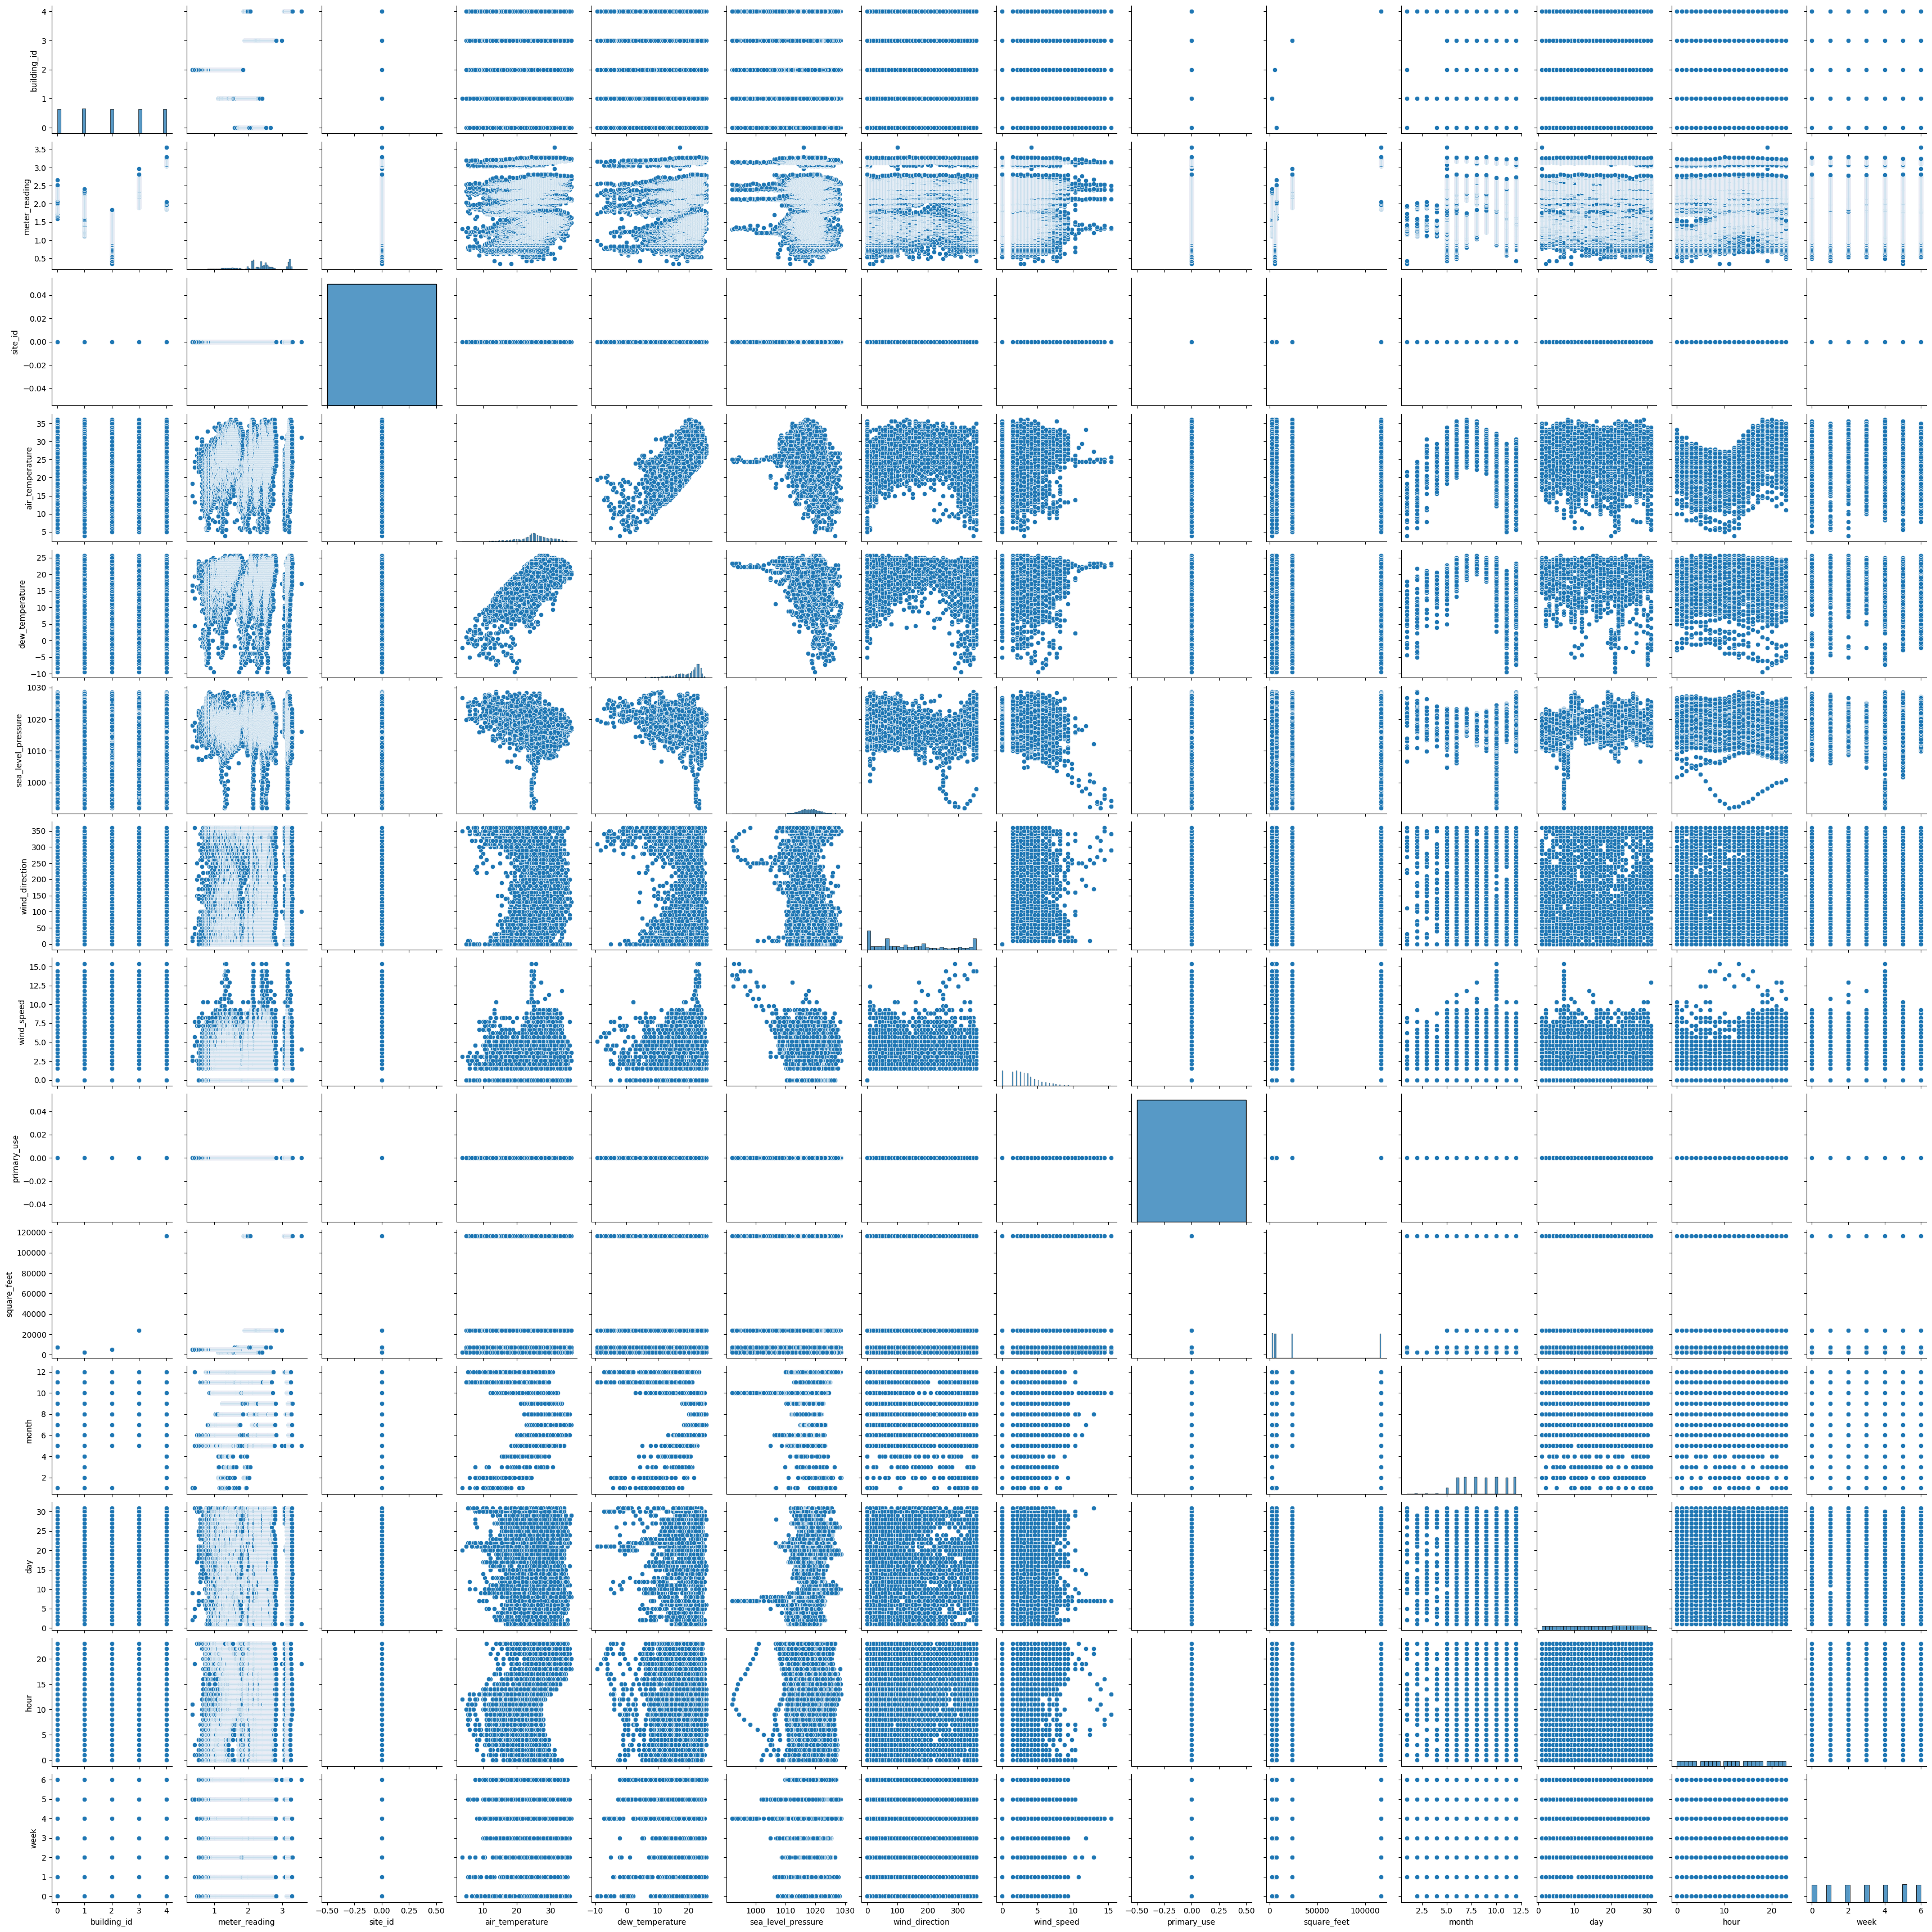

In [12]:
 #多変量連関図生成
df_sns = df.drop(columns=['cloud_coverage','precip_depth_1_hr','year_built',
                          'floor_count','site_id','primary_use'])　 # 欠損値の多い変数を削除
sns.pairplot(df_sns[df_sns['building_id']<10])

## 欠損値、外れ値除去

In [6]:
#欠損値割合の表示
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
floor_count,8580691,0.746948
year_built,6322085,0.550337
cloud_coverage,5041037,0.438822
precip_depth_1_hr,2437674,0.212199
sea_level_pressure,958198,0.083411
wind_direction,609513,0.053058
wind_speed,22521,0.001960
dew_temperature,5077,0.000442
air_temperature,3368,0.000293
hour,0,0.000000


In [7]:
#0で置換
df = df.fillna(0)
df

,building_id,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,square_feet,year_built,floor_count,month,day,hour,week
6024229,740,0.000174,5,17.0,0.0,16.0,0.0,0.0,280.0,5.7,0,37975,1976,1,7,16,23,5
6023794,740,0.000174,5,13.0,0.0,11.0,0.0,0.0,290.0,11.3,0,37975,1976,1,6,28,20,1
6023795,740,0.000174,5,12.0,0.0,10.0,0.0,0.0,300.0,10.3,0,37975,1976,1,6,28,21,1
6023796,740,0.000174,5,12.0,0.0,10.0,0.0,0.0,290.0,5.7,0,37975,1976,1,6,28,22,1
6023797,740,0.000174,5,13.0,0.0,12.0,0.0,0.0,280.0,5.1,0,37975,1976,1,6,28,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6441851,799,3.996202,7,-2.8,0.0,-4.3,0.0,994.8,280.0,7.7,0,527431,1976,26,11,21,5,0
6442173,799,3.996442,7,-5.9,0.0,-6.7,6.0,1018.4,80.0,4.6,0,527431,1976,26,12,12,5,0
6441673,799,3.998103,7,-0.2,0.0,-2.7,0.0,1017.0,250.0,1.5,0,527431,1976,26,11,10,5,3
6442078,799,3.998147,7,-1.7,0.0,-2.2,0.0,1018.0,360.0,0.0,0,527431,1976,26,12,6,5,1


In [ ]:
#単変量解析
meter_reading_scaled = StandardScaler().fit_transform(df0['meter_reading'][:,np.newaxis]);
low_range = meter_reading_scaled[meter_reading_scaled[:,0].argsort()][:10]
high_range= meter_reading_scaled[meter_reading_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

#二変量解析
sns.pairplot(df)

## モデル学習

In [8]:
# ライブラリーの読み込み
import pandas as pd
import numpy as np
import os
from sklearn.metrics import r2_score            # 決定係数
from sklearn.metrics import mean_squared_error  # RMSE
from sklearn.model_selection import GridSearchCV # gridsearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, confusion_matrix
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# データセットの準備
y = df['meter_reading'].values     # 目的変数(id毎の売上高)
X = df.drop(columns=['meter_reading','cloud_coverage','precip_depth_1_hr','year_built', 'floor_count'],axis=1)  # 説明変数
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # テスト用データセット：学習用データセット＝ 20 ： 80
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1) # 検証用データセット：学習用データセット＝ 30 ： 70

In [10]:
# パラメータの準備
cv_params = {'reg_alpha': [0.0001, 0.003, 0.1],
             'reg_lambda': [0.0001, 0.1],
             'num_leaves': [2, 3, 4, 6],
             'colsample_bytree': [0.4, 0.7, 1.0],
             'subsample': [0.4, 1.0],
             'subsample_freq': [0, 7],
             'min_child_samples': [0, 2, 5, 10]
             }

# モデルインスタンスの作成
model = lgb.LGBMRegressor()

#GridSearchインスタンスの生成及び学習実行(cv→交差検証)
# gscv = GridSearchCV(model, params, scoring="neg_mean_squared_error", cv=5)
model.fit(X_train,y_train)
# print(gscv.best_params_)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.114572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1409
[LightGBM] [Info] Number of data points in the train set: 6433093, number of used features: 13
[LightGBM] [Info] Start training from score 1.806597


LGBMRegressor()

In [11]:
GridSearchパラメータ評価
y_train_pred = gscv.predict(X_train)# 予測値(Train）
y_val_pred = gscv.predict(X_val)# 予測値（valid)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習: %.2f, 検証: %.2f' % (
        mean_squared_error(y_train, y_train_pred, squared=False), # 学習
        mean_squared_error(y_val, y_val_pred, squared=False)    # 検証
      ))

# 決定係数(R^2)
print('R^2 学習: %.2f, 検証: %.2f' % (
        r2_score(y_train, y_train_pred), # 学習
        r2_score(y_val, y_val_pred)    # 検証
      ))


学習、テストデータ評価
y_train_pred = gscv.predict(X_train)# 予測値(Train）
y_test_pred = gscv.predict(X_test)# 予測値（Test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習: %.2f, テスト: %.2f' % (
        mean_squared_error(y_train, y_train_pred, squared=False), # 学習
        mean_squared_error(y_test, y_test_pred, squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習: %.2f, テスト: %.2f' % (
        r2_score(y_train, y_train_pred), # 学習
        r2_score(y_test, y_test_pred)    # テスト
      ))

RMSE 学習: 0.26, テスト: 0.26
R^2 学習: 0.85, テスト: 0.85


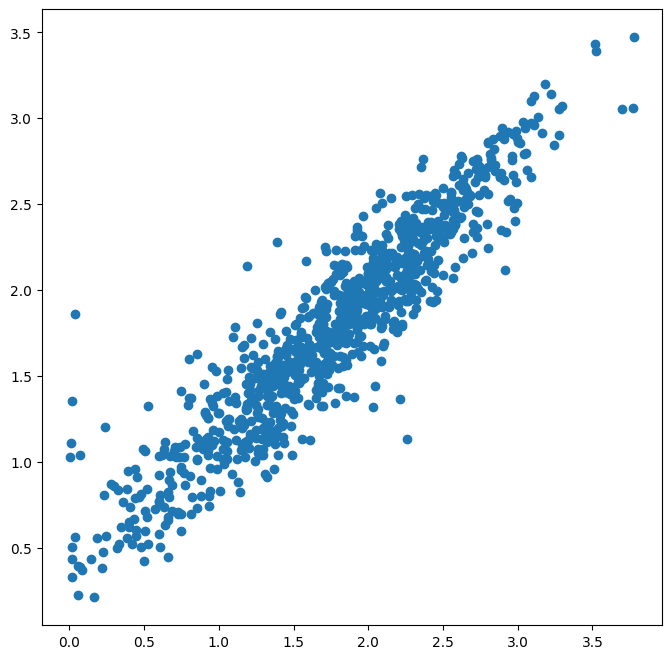

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_test[:1000], y_test_pred[:1000])
fig.show()

1   building_id   1159
2   square_feet   981
3   primary_use   470
4   hour   98
5   sea_level_pressure   79
6   site_id   57
7   month   49
8   week   45
9   air_temperature   33
10   dew_temperature   25
11   day   4
12   wind_speed   0
13   wind_direction   0


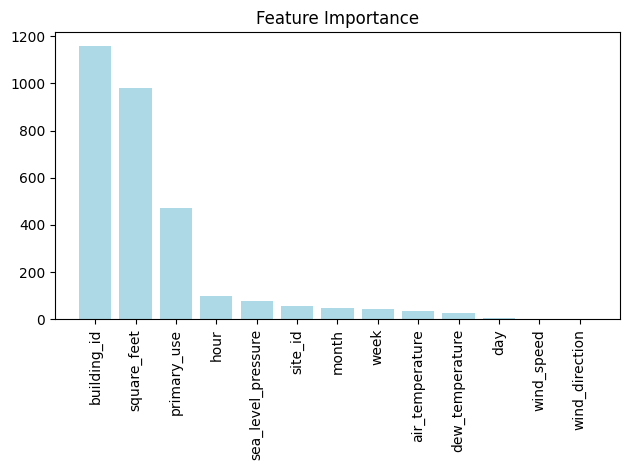

In [16]:
#特徴量の重要度
feature = model.feature_importances_

#特徴量の名前
label = X.columns[0:]

#特徴量の重要度順（降順）
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print(str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()

In [17]:
 str(label[indices[0]])

'building_id'